In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def imshow(image):
    cv.imshow('image', image)
    cv.waitKey(0) 
    cv.destroyWindow('image')

#### Basics

features в cv - это уникальные, для изображения его части(области), они полезны, например, для задач отслеживания (SLAM)  
или объединения фотографий. Фич может быть множество, но какие из них хорошие ? Нагло сопрем картинку с туториала opencv  

![building](./info/feature_building.jpg)

на этой картинке фичи А и В не очень хороши. Это просто плоскости на изображении. Вырезав их из  
изображения вернуть на место будет затруднительно. То же самое и с фичами C и D. Это по сути края  
крыши, но так или иначе это может быть любая этого края. Вернуть на место такую фичу тоже невозможно.  
Зато фичи E и F это углы, которые всегда уникальны. Так что это классные фичи, которыми можно хорошо описать картинку. Теперь можно перейти к более общей картинке  

![fetures](./info/feature_simple.png)

на ней все тоже очень просто. Синяя область это такая же плоскость, так что взяв его в качестве  
фичи, мы скорее всего не сможем восстановить его местоположение. Черная, это фичи C и D из прошлой  
картинки. С ней тоже не все так просто. А вот красная область, это снова угол, так что это хорошая  
фича, так что брать её можно смело.  
Что мы собственно с ней делаем ? Мы берем эту область и описываем её. По человечески это было бы что то  
вроде это угол слева направо, с выходящим карнизом и небом на ним. Примерно то же самое делает алгоритм  
Первый этап Feature Detection - обнаружение
Второй этап Feature Description - описание

#### Harris Corner Detector

Просто алогоритм, построенный на идее резкого перепада значения Sobel-производных в районе границ.  

![harris1](./info/Harris1.png)  
![harris2](./info/Harris2.png)  

у нас 3 настраимых параметра в функции opencv.  
blocksize - Отвечает за количество соседей, которым будет присвоен вес и для которых будет вычислена производная   
ksize - размер окна свертки в Sobel свертке   
k - свободный параметр из формулы оценки  

Для алгоритма(вообще для вычисления производной) нужно, чтобы картинка обязательно была серой. 

(640, 640)


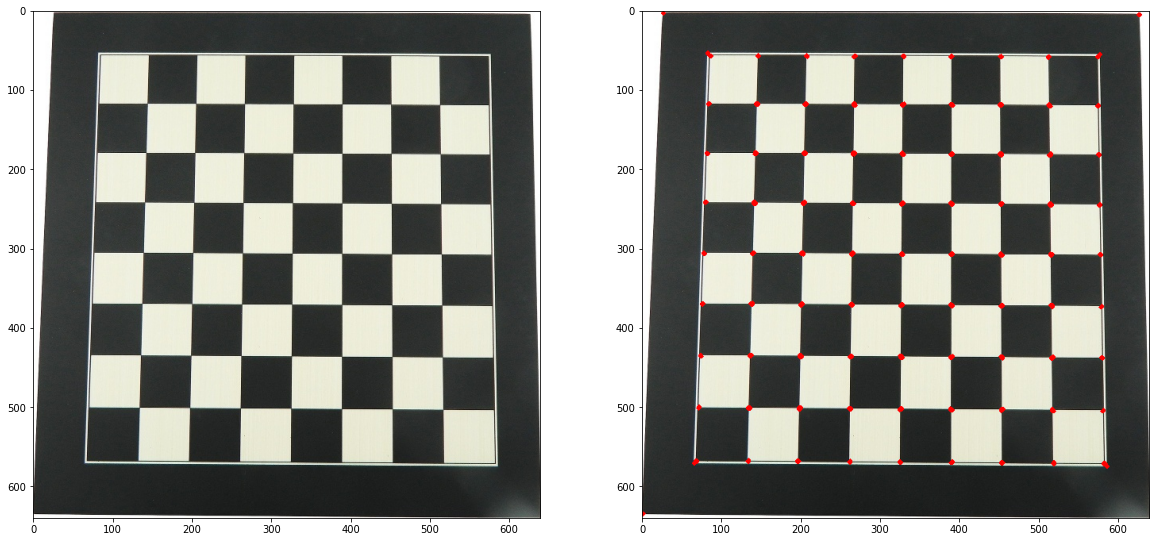

In [13]:
img = cv.imread("./ph/example.jpg")


f = plt.figure(figsize=(20,20))
f.add_subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

corners = cv.cornerHarris(np.float32(gray), 2, 3, 0.01)
print(corners.shape)
(x,y) = gray.shape
maxim = corners.max()
for i in range(x):
    for j in range(y):
        # алгоритм расплывчато говорит, что если итоговое значение "большое", то это угол
        if corners[i,j] > 0.01 * maxim :
            cv.circle(img, (j,i), radius=2, thickness=1, color = (0,0,255))

f.add_subplot(122)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


в теории, алогоритм детектит и ребра, так что можем поиграться с параметрами, исправить условие и отрисовать их

(640, 640)


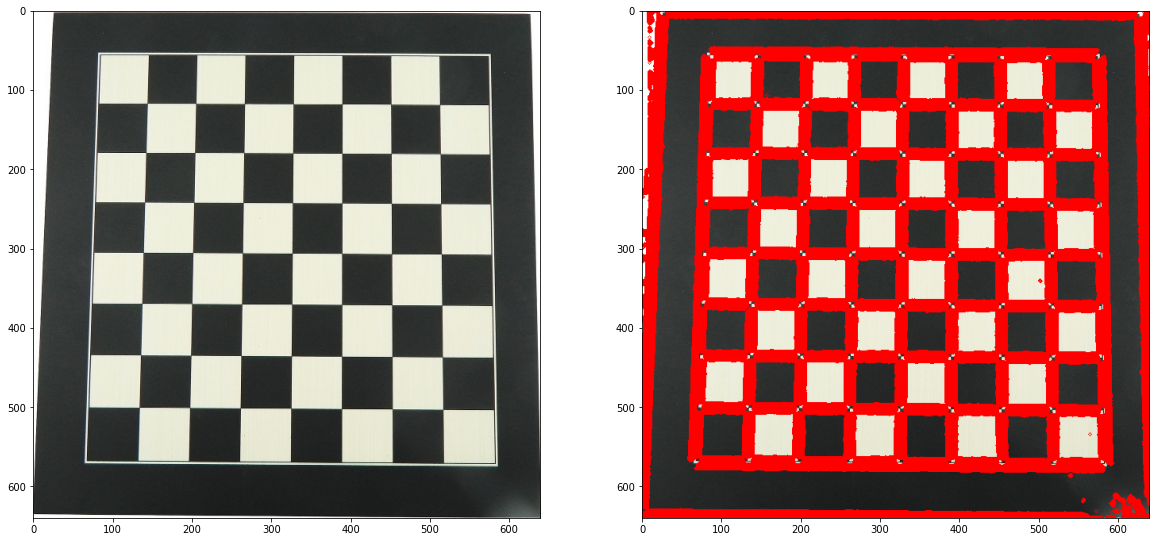

In [22]:
img = cv.imread("./ph/example.jpg")


f = plt.figure(figsize=(20,20))
f.add_subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

corners = cv.cornerHarris(np.float32(gray), 6, 11, 0.01)
print(corners.shape)
(x,y) = gray.shape
maxim = corners.max()
for i in range(x):
    for j in range(y):
        # алгоритм расплывчато говорит, что если итоговое значение "большое", то это угол
        if corners[i,j] < 0:
            cv.circle(img, (j,i), radius=2, thickness=1, color = (0,0,255))

f.add_subplot(122)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

#### Good features to Track/Shi-Tomas corner

По большому счету это улучшение прошлого алгоиритма. Мы просто меняем критерий R, заменяя его минимумом двух собственных чисел. Алгос ищет все углы, преодолевающие порог,   
выбирает те, что лежат дальше друг от друга, чем заданное расстояние, сортит по убыванию и берет первые n заданных.  
итого 3 параметра:
1. количество углов (максимальное, может быть меньше), которые мы хотим найти
2. пороговое значение, для метрики R
3. Минимальное евклидово расстояние между углами. Почему, на пример не манхетенское, знает только создатель

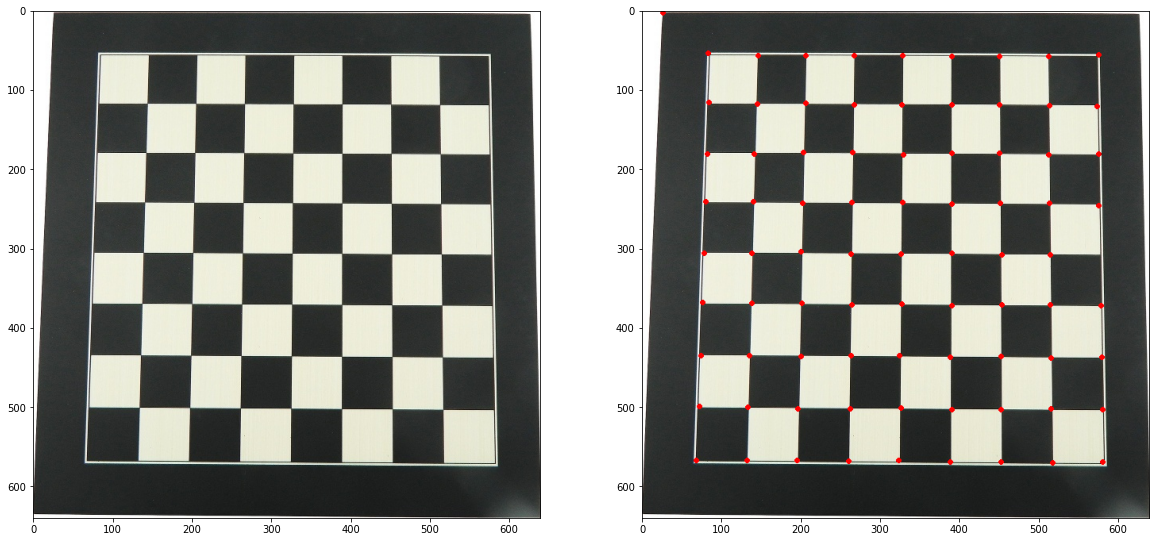

In [25]:
img = cv.imread("./ph/example.jpg")
grayed = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
copy = img.copy()
corners = cv.goodFeaturesToTrack(grayed, 81, 0.01, 30)
for i in corners:
    x, y = i.ravel()
    cv.circle(copy, (np.int32(x),np.int32(y)), radius=2, color = (0,0,255), thickness=2)

f = plt.figure(figsize=(20,20))
f.add_subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
f.add_subplot(122)
plt.imshow(cv.cvtColor(copy, cv.COLOR_BGR2RGB))

#### Sift & Surf

Пацаны жестко патентуют алгоритмы. Учитывая, что пока что патент жив, наверное смысл с ними разбираться нет 

#### ORB

Ну, это бесплатная альтернатива сифту и сёрфу. Он скейл инварантен, т.е. даже в случае рескейла картинки найдутся те же самые keypoints.

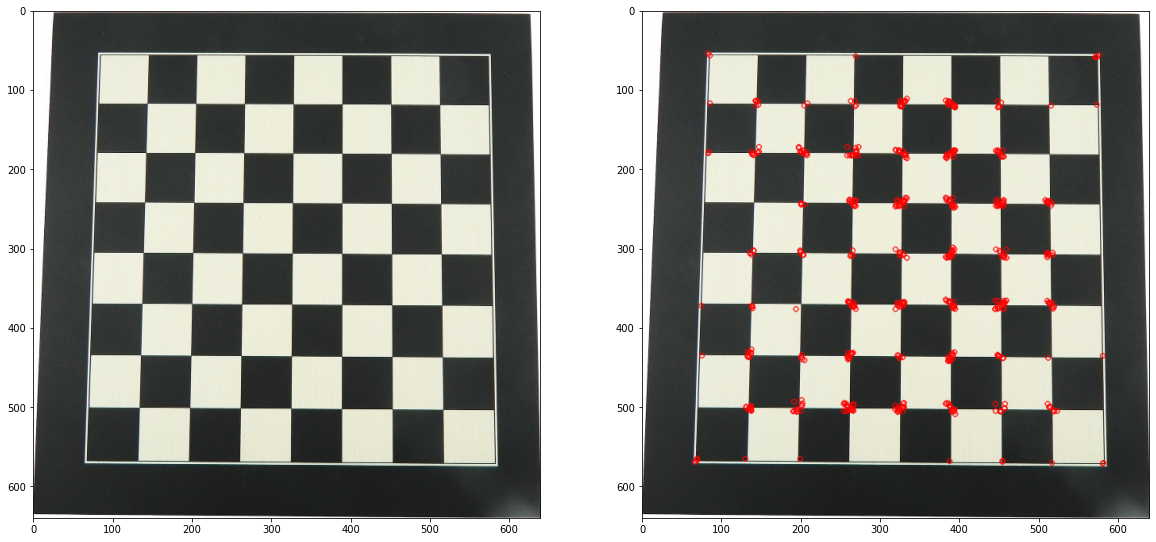

In [34]:
img = cv.imread("./ph/example.jpg")
img = cv.resize(img, (640,640))
grayed = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# instance
orb = cv.ORB_create()

# locating keypoints
keypoints = orb.detect(grayed, None)

# now describing keypoints
keypoints, descriptors = orb.compute(grayed, keypoints)

finalImage = cv.drawKeypoints(img, keypoints, None, color=(0,0,255))
f = plt.figure(figsize=(20,20))
f.add_subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
f.add_subplot(122)
plt.imshow(cv.cvtColor(finalImage, cv.COLOR_BGR2RGB))